# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

IMG_0037.PNG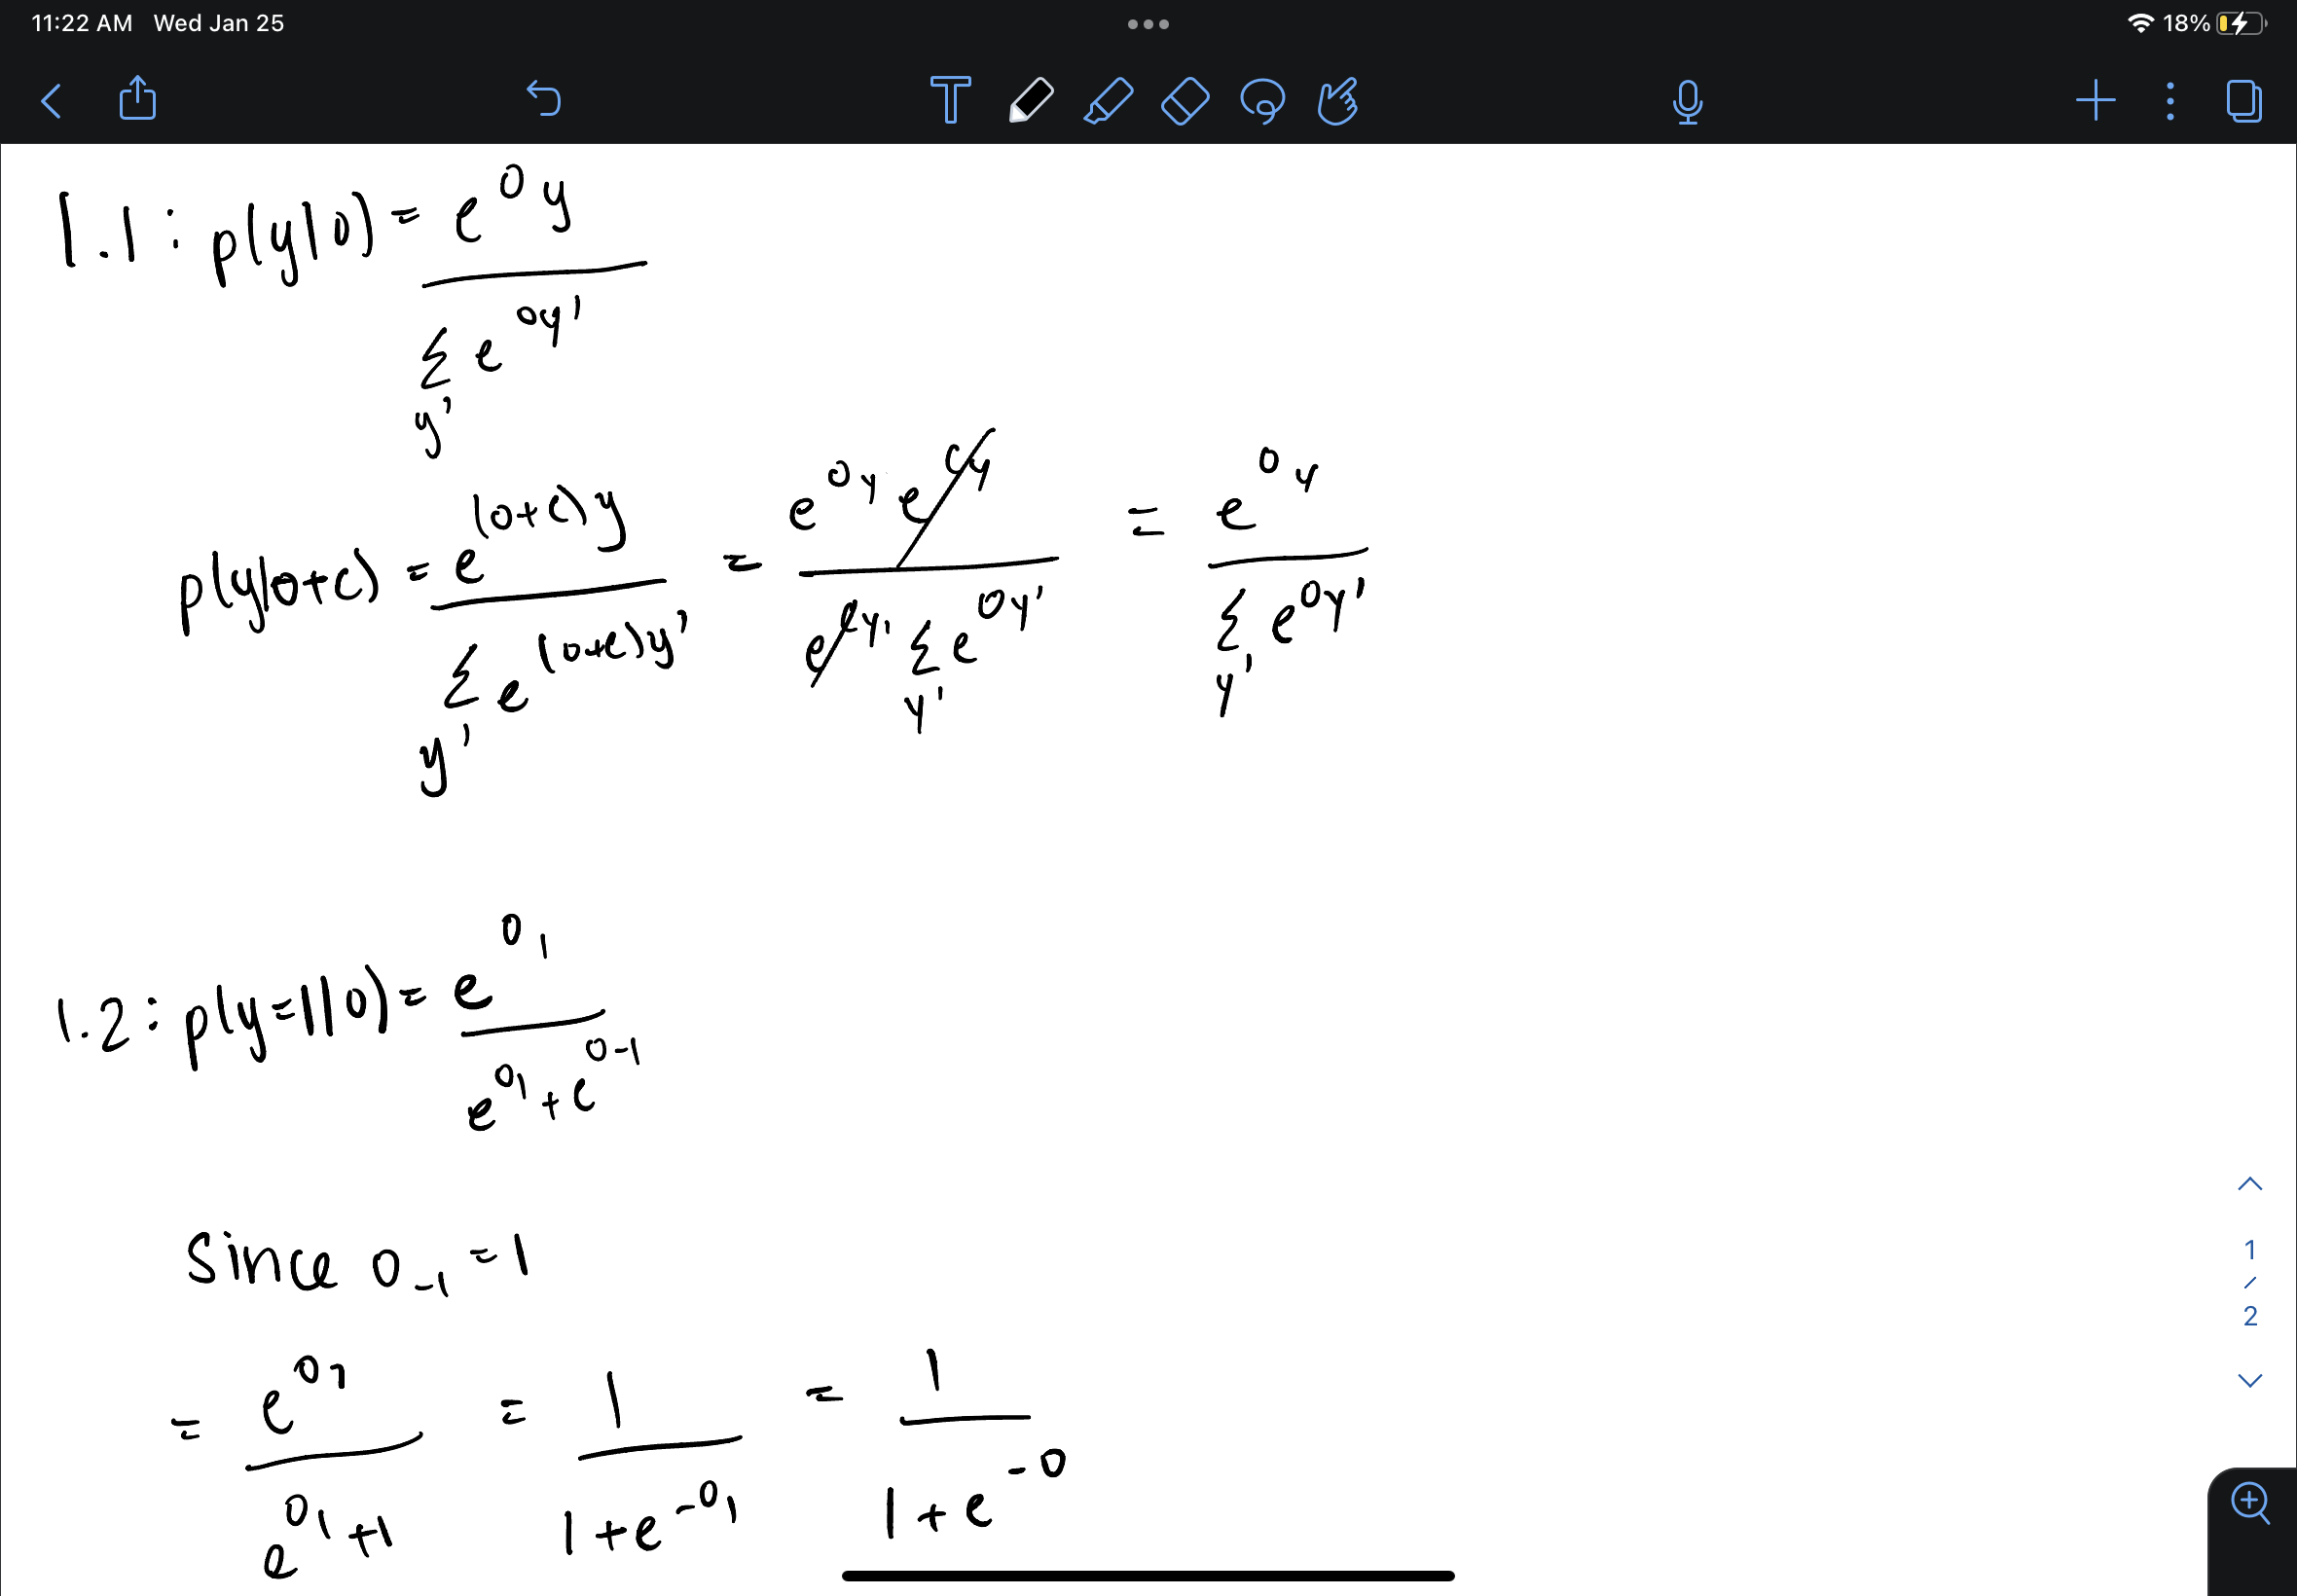

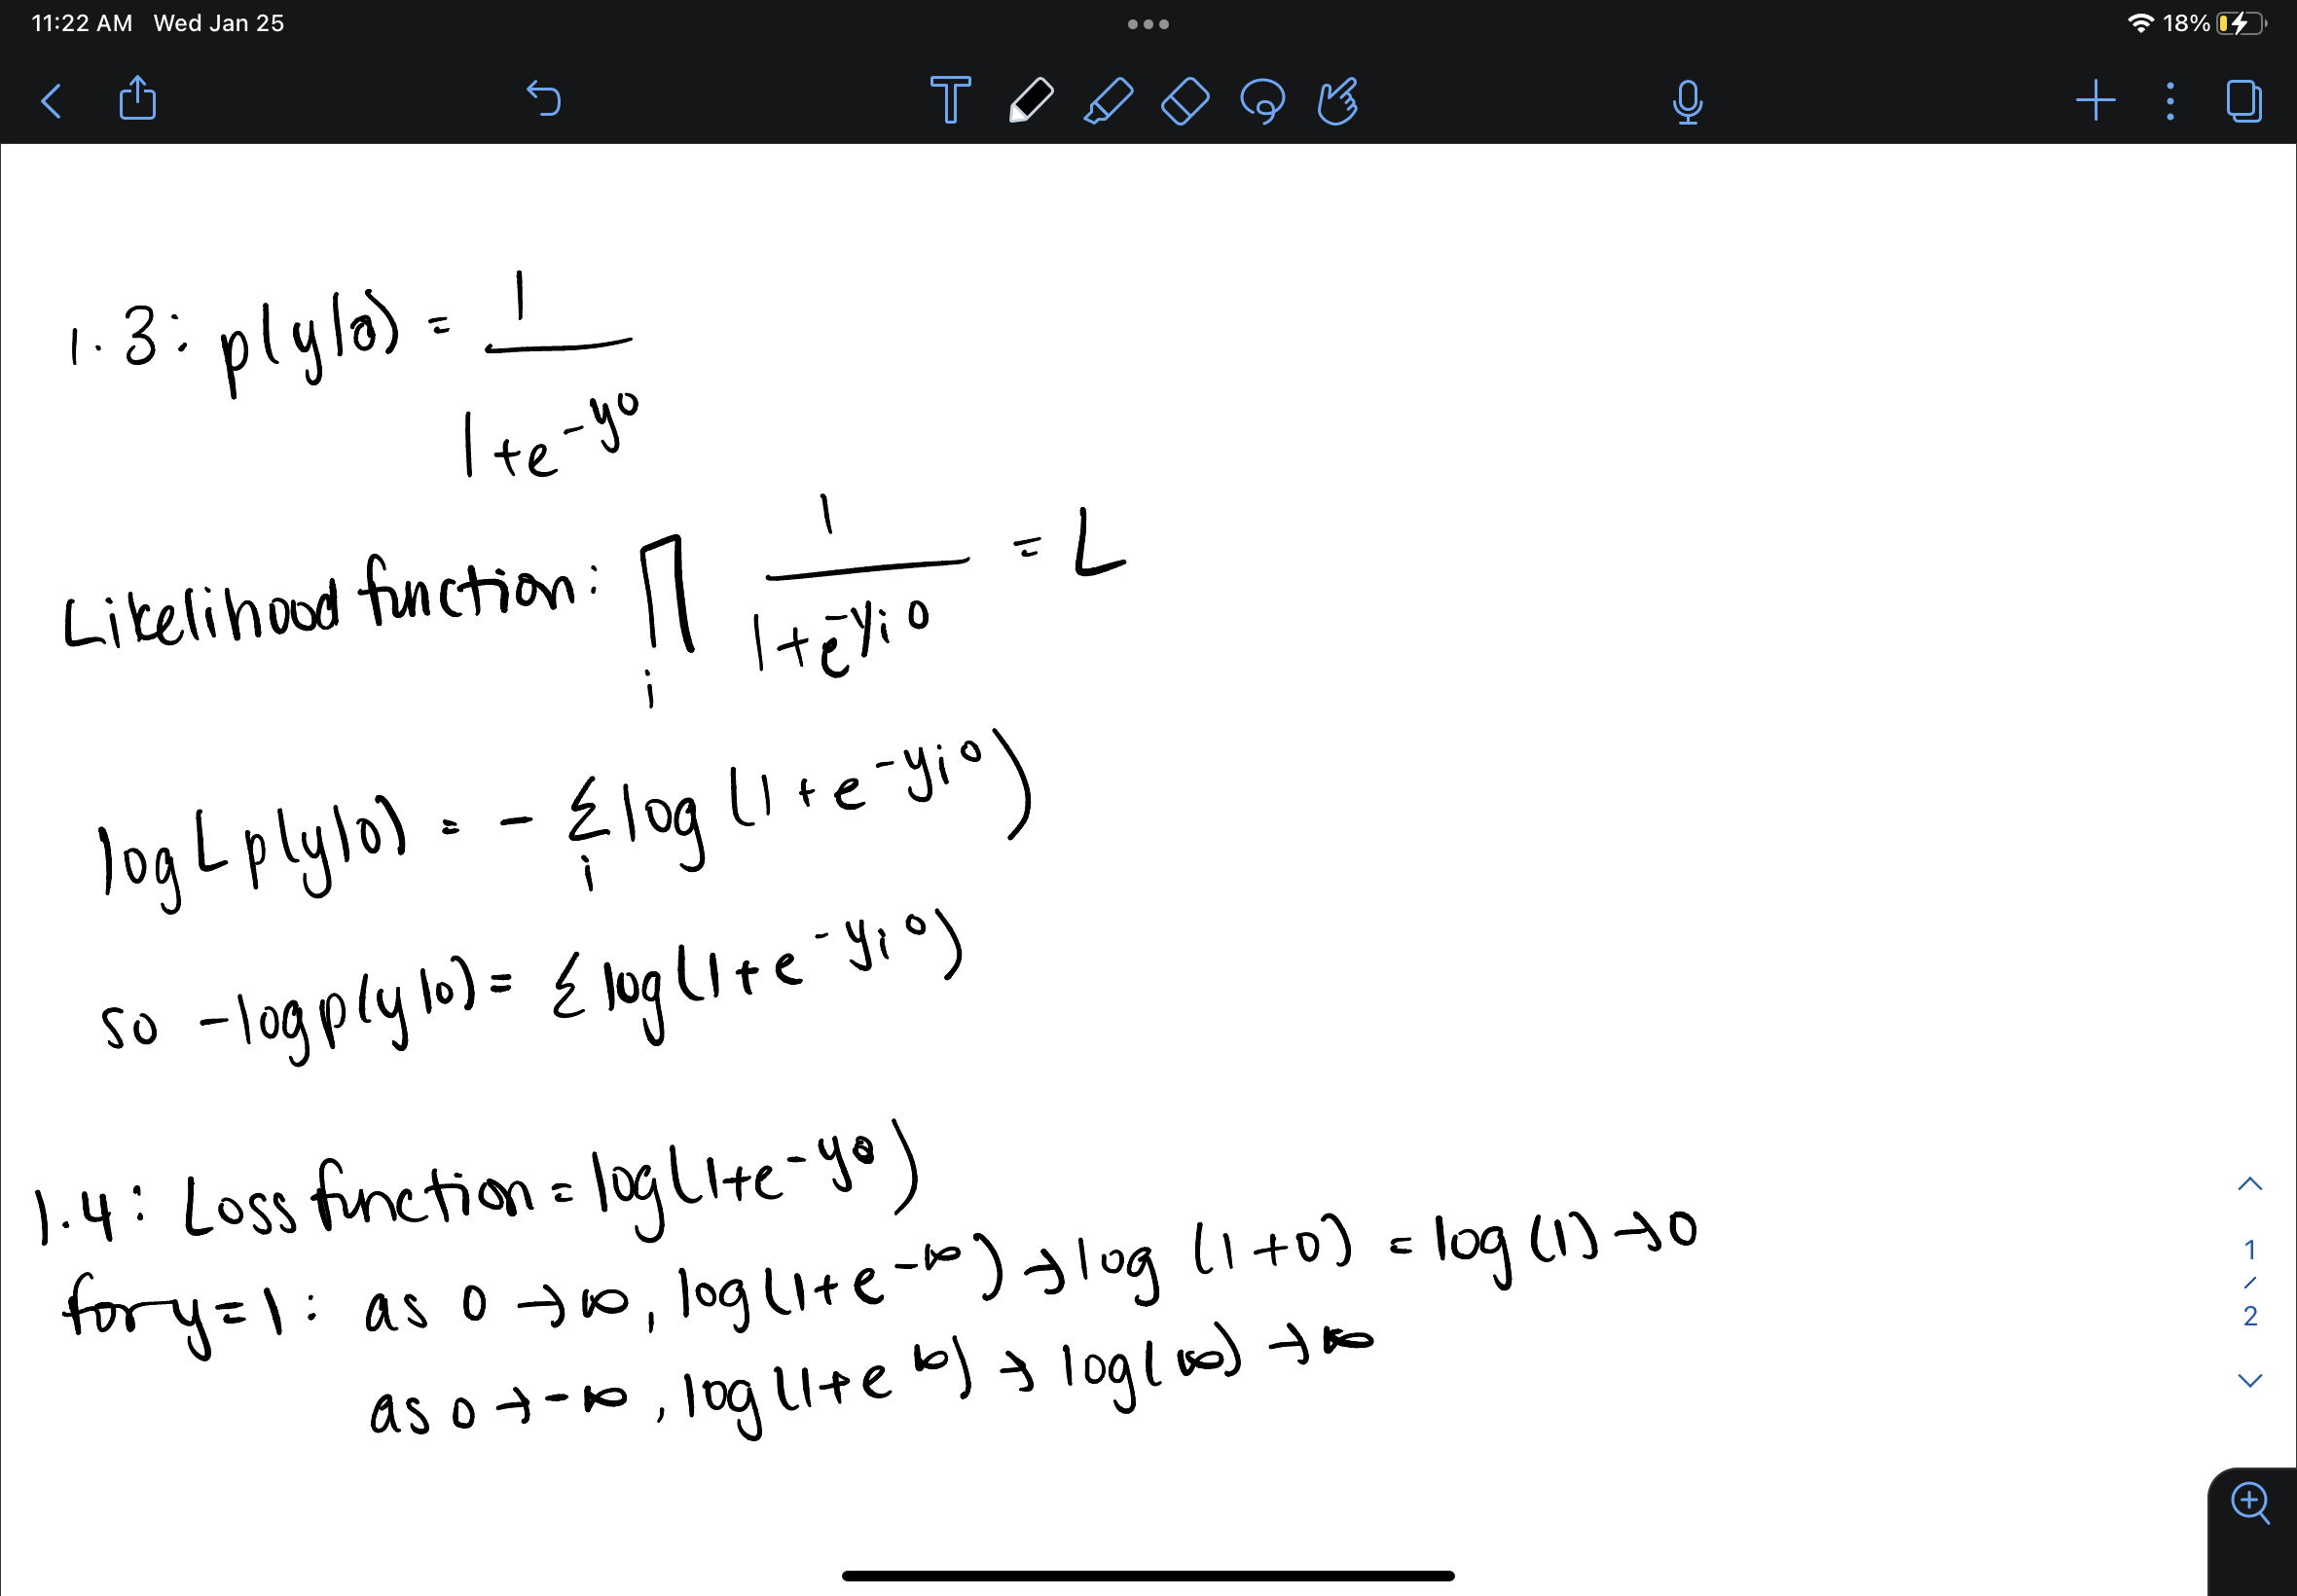

# 2. Implementing the logistic loss (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

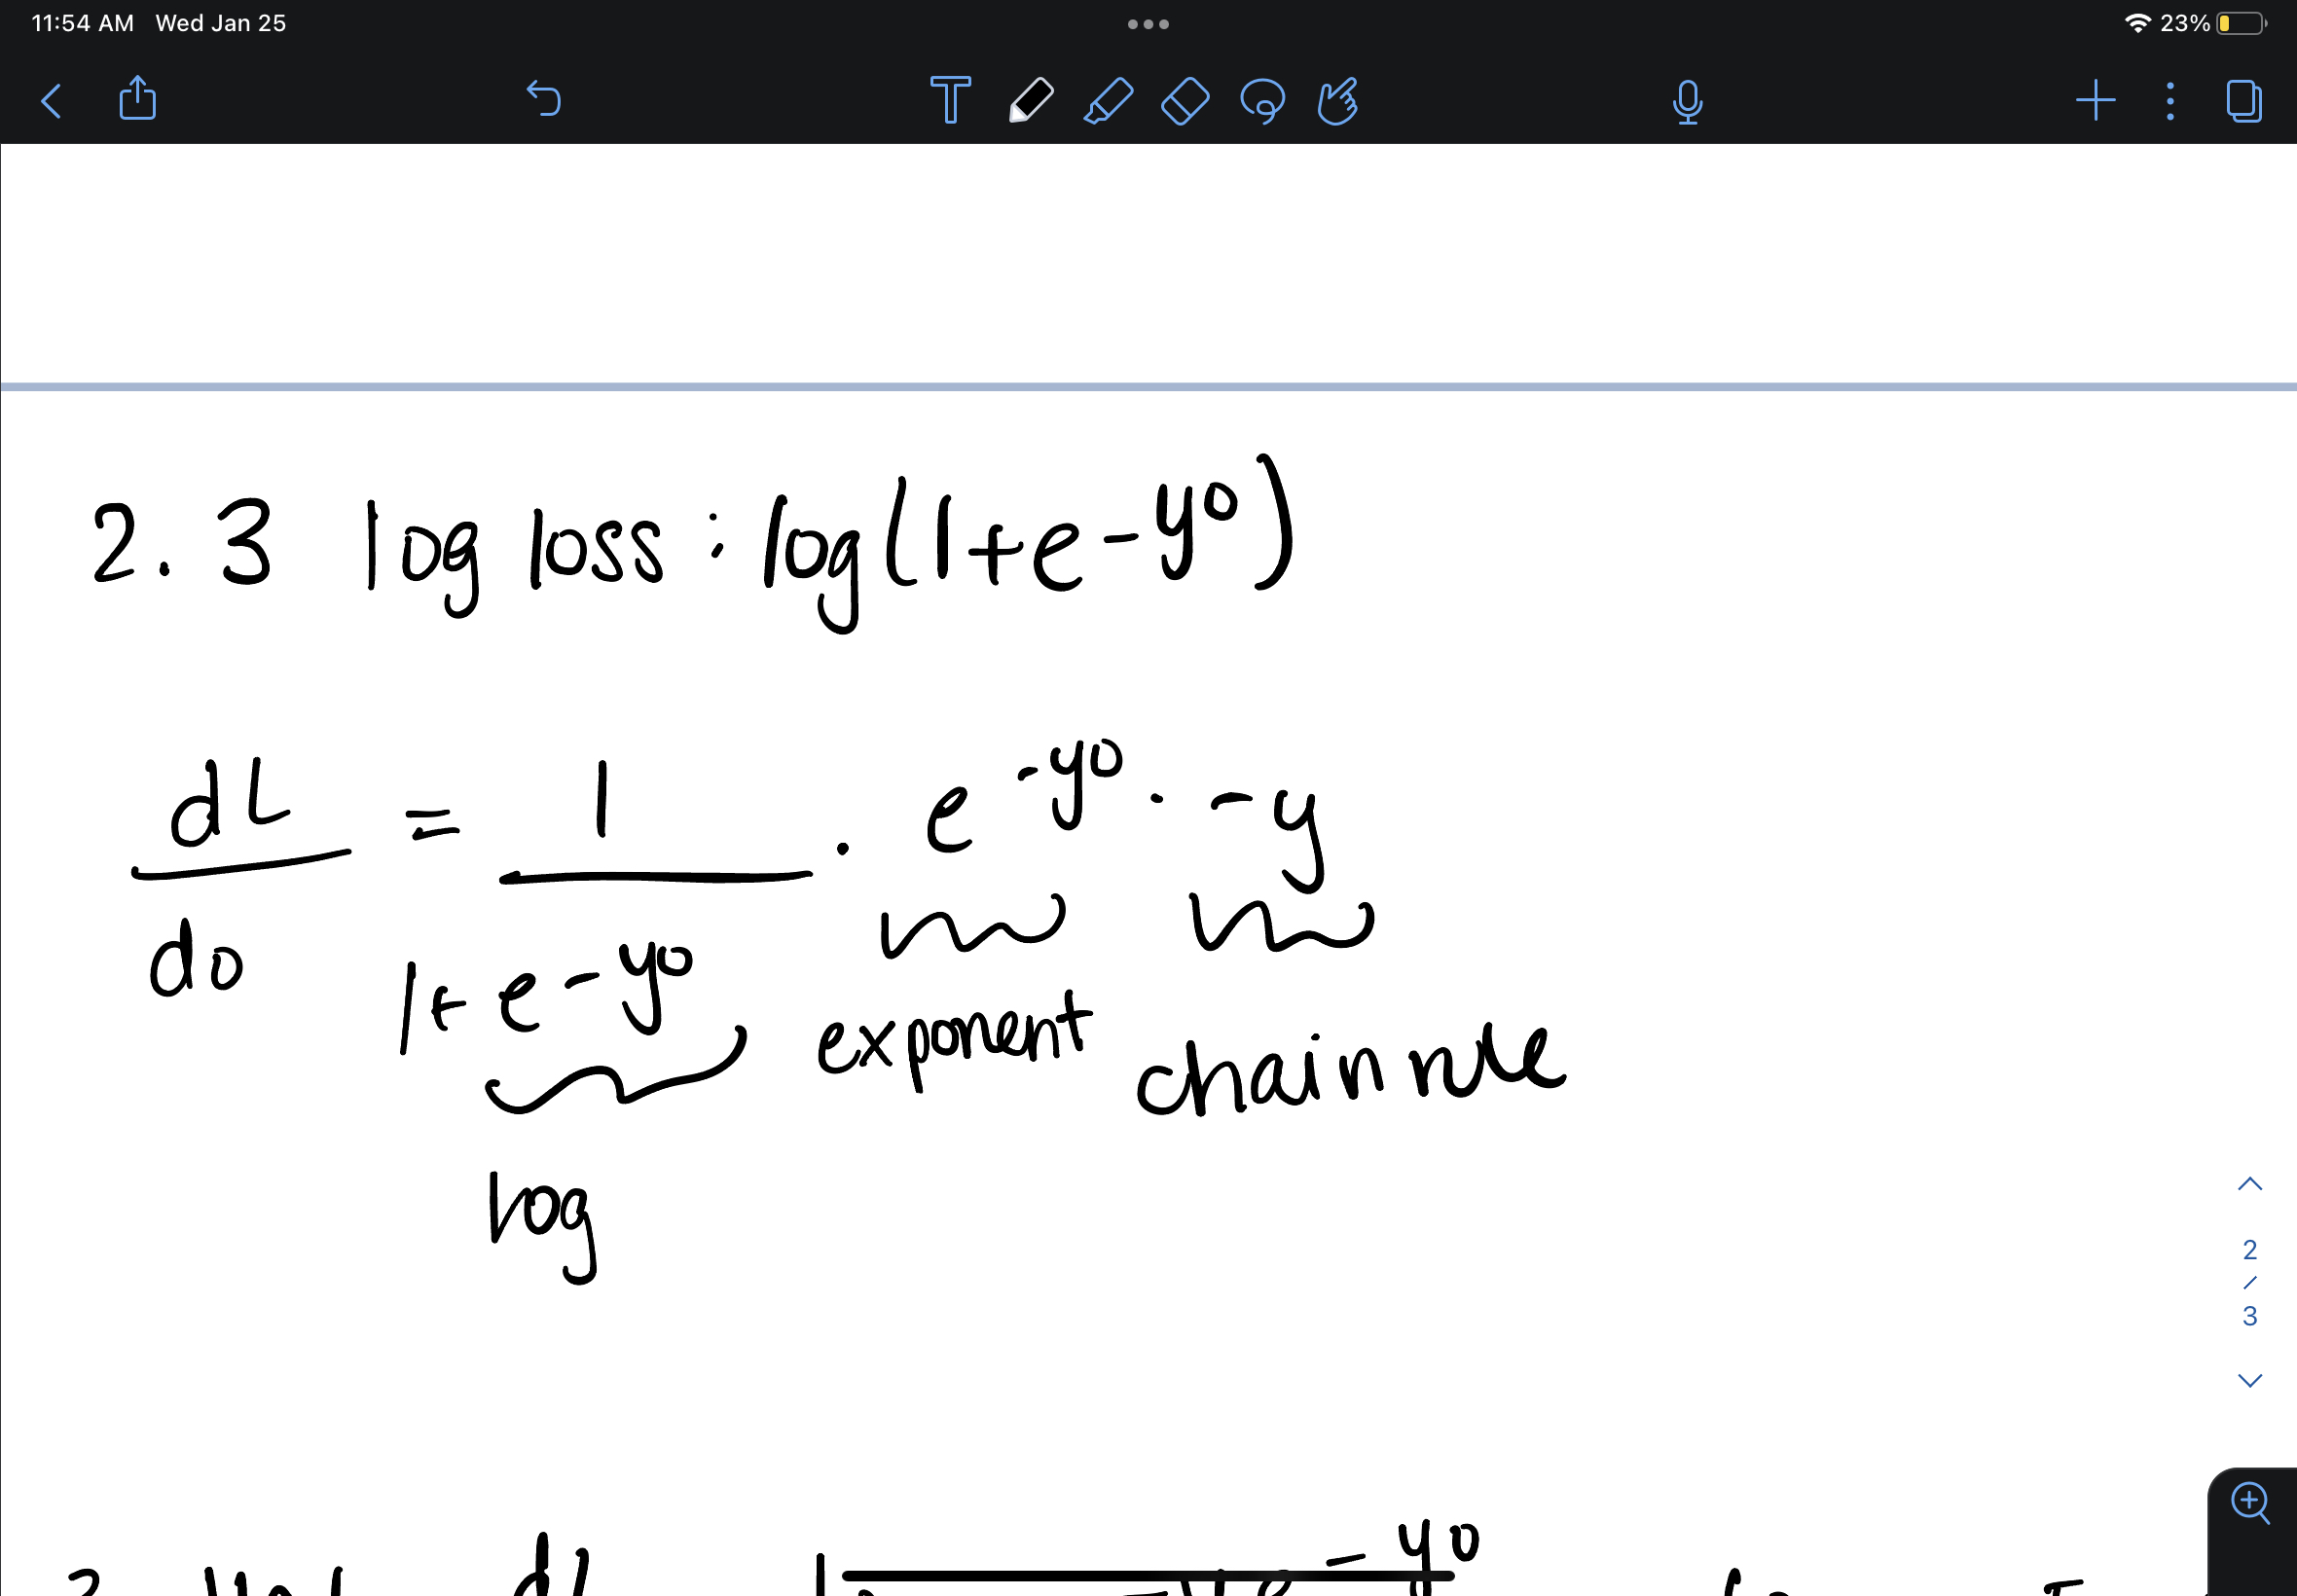

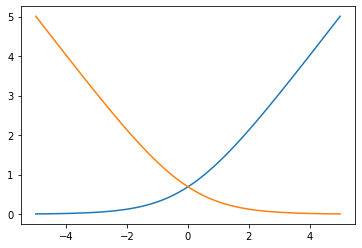

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def log_loss(y,o):
  return np.log(1 + np.exp(-y * o))

def deriv_log_loss(y,o):
  return (-y * np.exp(-y * o)) / (1 + np.exp(-y * o))

o_vals = np.linspace(-5,5,num = 100)
log_loss_vals_neg = log_loss(-1, o_vals)
log_loss_vals_pos = log_loss(1, o_vals)
plt.plot(o_vals, log_loss_vals_neg)
plt.plot(o_vals, log_loss_vals_pos)


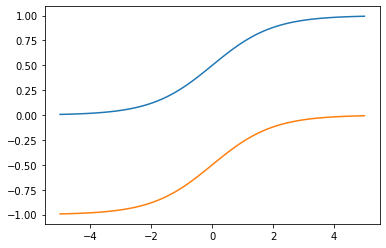

In [ ]:
plt.plot(o_vals, deriv_log_loss(-1, o_vals))
plt.plot(o_vals, deriv_log_loss(1, o_vals))

<ipython-input-8-f6a60d8b9a5b>:5: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * o))


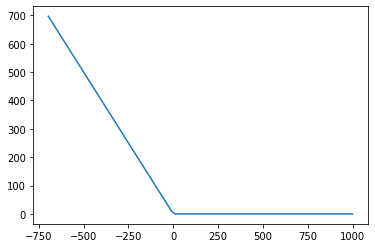

In [ ]:
new_ovals = np.linspace(-1000, 1000, 100)
plt.plot(new_ovals, log_loss(1, new_ovals))

For large negative values of o, the loss is higher than larger positive values of o, so this is a representation of the limits of the logistic loss function. As o approaches infinity, the loss goes to 0, and as o approaches negative inifinity, the loss goes to infinity. 

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

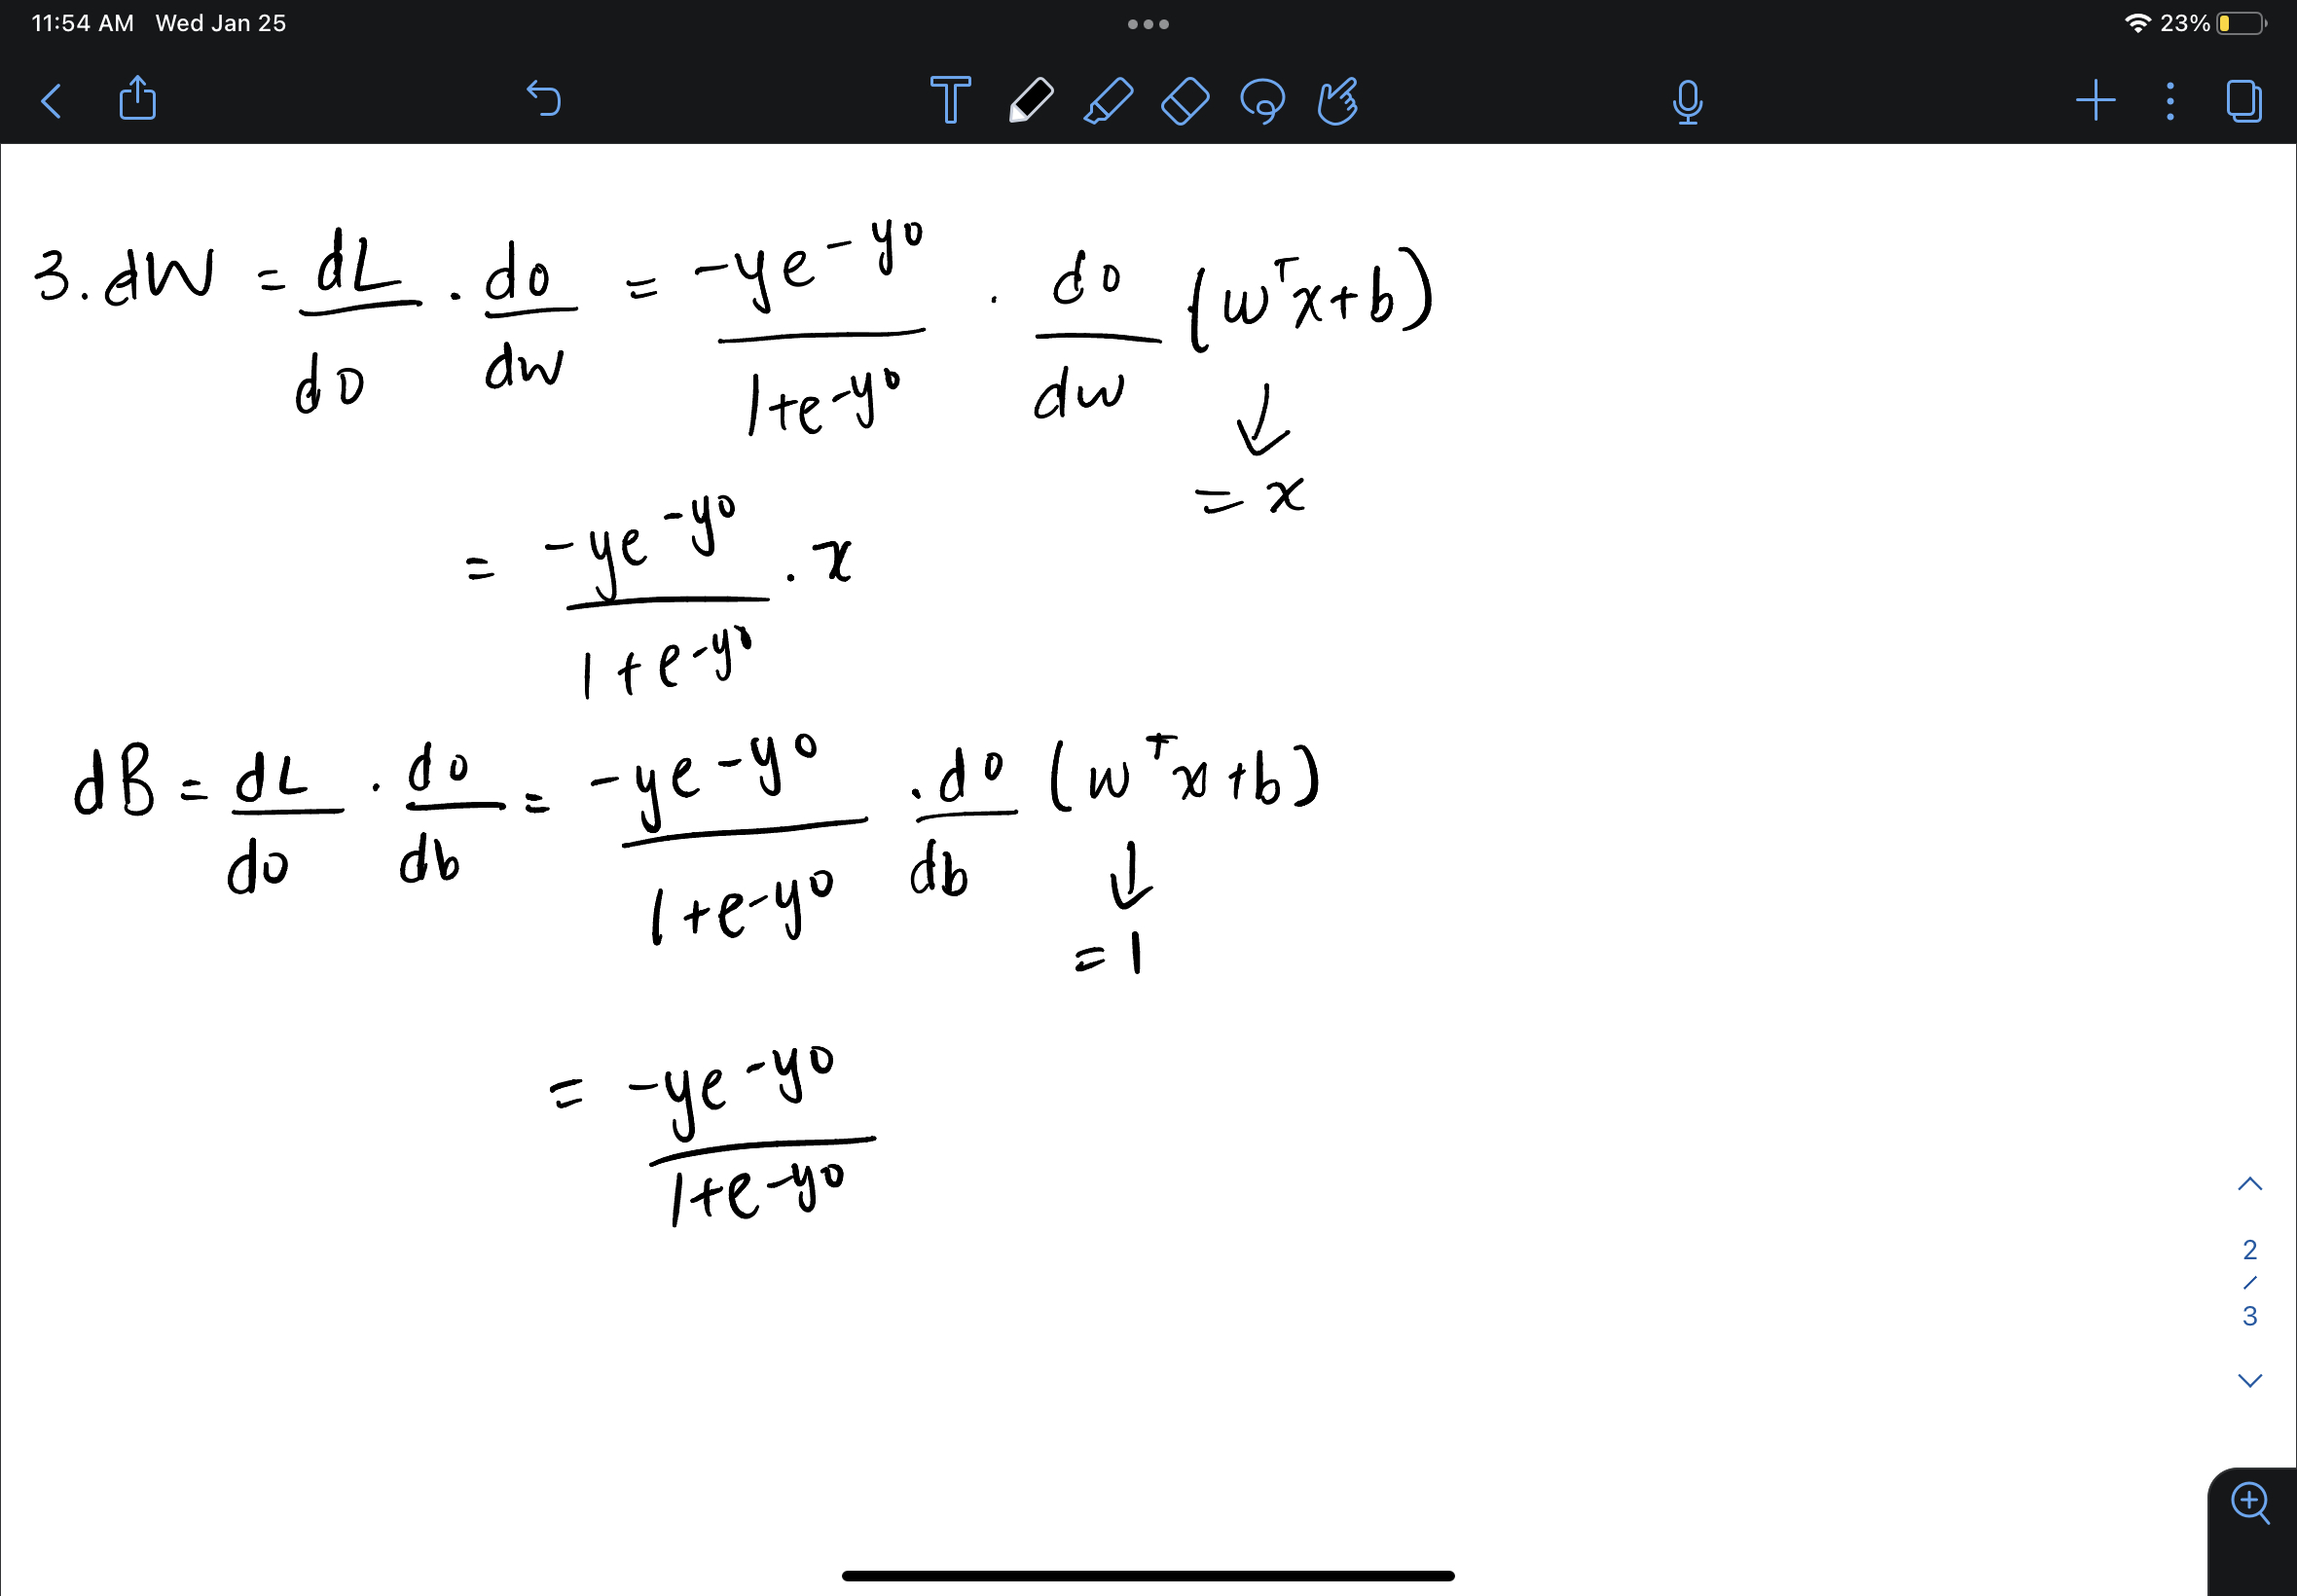

In [2]:
import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

def model(X, Y, learning_rate, iterations):
    m = len(X)

    W = 0
    B = 0

    loss_list = []

    for i in range(iterations):
        
        o = W*X + B
        loss = (1/m) * np.sum(log_loss(y,o))
        
        dW = (1/m) * np.sum(deriv_log_loss(y,o) * X)
        dB = (1/m) * np.sum(deriv_log_loss(y,o))

        W = W - learning_rate * dW
        B = B - learning_rate * dB
        
        # Keeping track of our loss function value
        loss_list.append(loss)

        if i % 1000 == 0:
            print("loss after ", i, "iteration is : ", loss)

    return W, B, loss_list


x ,y = generate_data()

iterations = 10000
learning_rate = 0.05 #0.0085
W, B, cost_list = model(x,y, learning_rate = learning_rate, iterations = iterations)
print(W, B)



loss after  0 iteration is :  0.6931471805599454
loss after  1000 iteration is :  0.00281921672423683
loss after  2000 iteration is :  0.0016319514673042539
loss after  3000 iteration is :  0.0011937665784026946
loss after  4000 iteration is :  0.0009593569541999646
loss after  5000 iteration is :  0.0008112085896546188
loss after  6000 iteration is :  0.0007081312640513808
loss after  7000 iteration is :  0.0006317652394115921
loss after  8000 iteration is :  0.0005726255986890883
loss after  9000 iteration is :  0.000525292067321855
2.6842632547191565 0.02009085282655456


I was able to acheive a loss of close to zero after training because the loss function for logistic regression is convex so it has only one global minima, so the gradient descent was able to find that minima.